<a href="https://colab.research.google.com/github/fhsmartins/MBA/blob/main/Aula03/AULA_22_SVM_Pr%C3%A1tica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AULA 22 - SVM - Prática

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import DecisionBoundaryDisplay

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_blobs, make_gaussian_quantiles
from sklearn.metrics import classification_report

# Função de Apoio para treinar um SVM e visualizar a função de decisão, margem de separação e vetores de suporte!

In [ ]:
# Adaptado de
# https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html#sphx-glr-auto-examples-svm-plot-svm-kernels-py
def svm_fit_plot(
    clf, X, y, ax=None, long_title=True, support_vectors=True
):
    # treina o modelo
    clf.fit(X, y)

    # plot
    _, ax = plt.subplots(figsize=(6, 5))

    common_params = {"estimator": clf, "X": X, "ax": ax}
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="predict",
        plot_method="pcolormesh",
        alpha=0.3,
    )
    DecisionBoundaryDisplay.from_estimator(
        **common_params,
        response_method="decision_function",
        plot_method="contour",
        levels=[-1, 0, 1],
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
    )

    if support_vectors:
        # Fazer um circulo nas instancias que representam vetores de suporte
        ax.scatter(
            clf.support_vectors_[:, 0],
            clf.support_vectors_[:, 1],
            s=150,
            facecolors="none",
            edgecolors="k",
        )

    # plotar e colorir conforme classe.
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors="k")

    if ax is None:
        plt.show()


# Construindo nosso conjunto de dados

<Axes: xlabel='0', ylabel='1'>

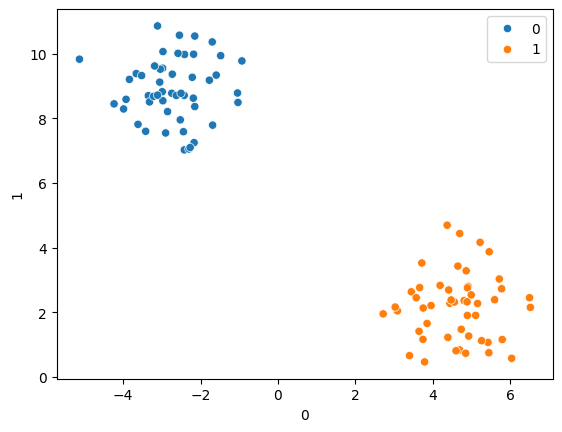

In [ ]:
from sklearn.datasets import make_blobs

data, labels = make_blobs(n_features=2,centers=2,cluster_std=1,random_state=42)
sns.scatterplot(data=pd.DataFrame(data), x=0, y=1,hue=labels)

# SVM com Kernel Linear

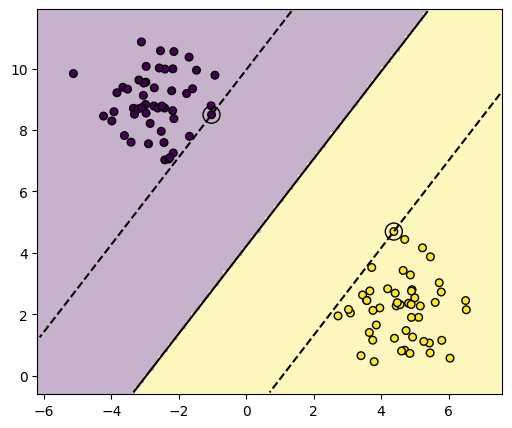

In [ ]:
X = data
y = labels
clf = svm.SVC(kernel="linear",C=1)
svm_fit_plot(clf,X,y)

# Vamos dificultar um pouco mais...

<Axes: xlabel='0', ylabel='1'>

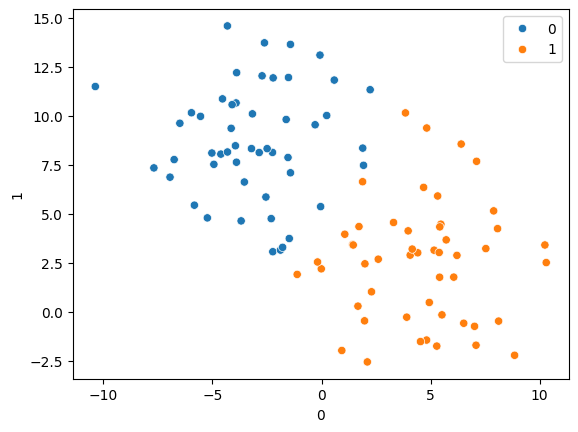

In [ ]:
# Quanto maior o cluster_std, maior será a sobreposição!
data, labels = make_blobs(n_features=2,centers=2,cluster_std=3,random_state=42)
sns.scatterplot(data=pd.DataFrame(data), x=0, y=1,hue=labels)

# SVM com Kernel Linear

Observe que é difícil definir uma boa margem de separação para problemas mais complexos!

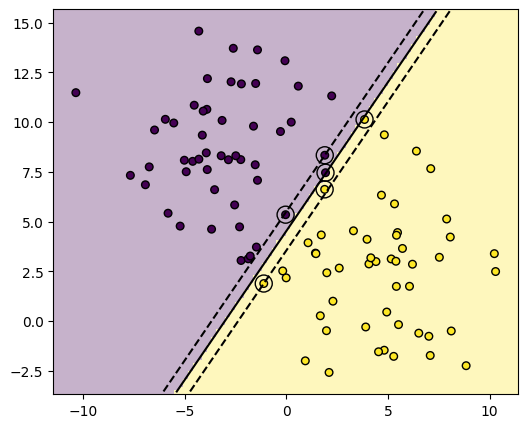

In [ ]:
X = data
y = labels
clf = svm.SVC(kernel="linear",C=1)
svm_fit_plot(clf,X,y)

# SVM com Kernel polinomial

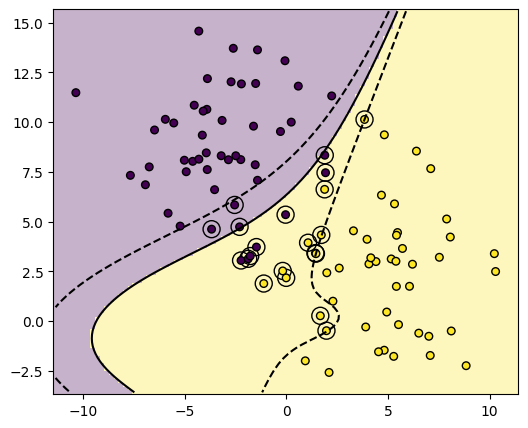

In [ ]:
X = data
y = labels
clf = svm.SVC(kernel="poly",C=1)
svm_fit_plot(clf,X,y)

# SVM com Kernel RBF

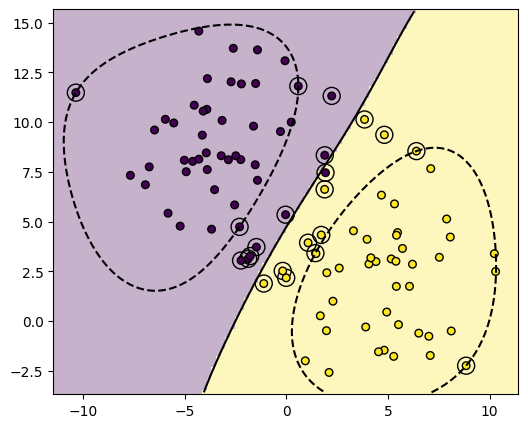

In [ ]:
X = data
y = labels
clf = svm.SVC(kernel="rbf",C=1)
svm_fit_plot(clf,X,y)

# Vamos experimental com um exemplo típico: xor é não linearmente separável.

<Axes: xlabel='0', ylabel='1'>

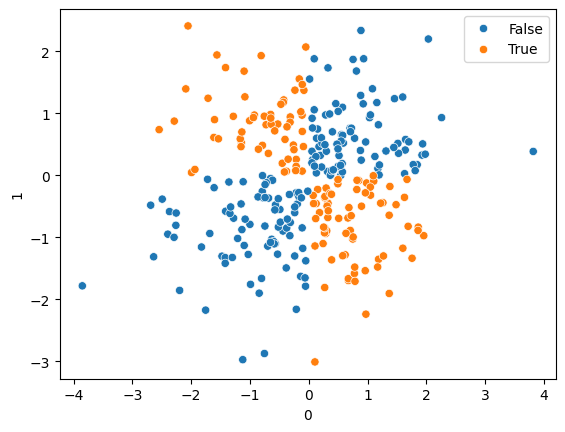

In [ ]:
data = np.random.randn(300, 2)
labels = np.logical_xor(data[:, 0] > 0, data[:, 1] > 0)
sns.scatterplot(data=pd.DataFrame(data), x=0, y=1,hue=labels)

# SVM com Kernel Linear

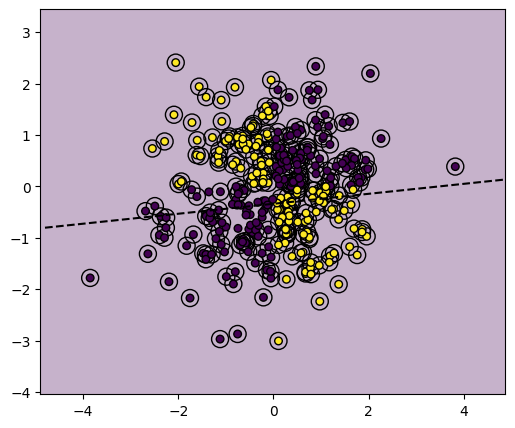

In [ ]:
X = data
y = labels
clf = svm.SVC(kernel="linear",C=1)
svm_fit_plot(clf,X,y)

# SVM com Kernel RBF

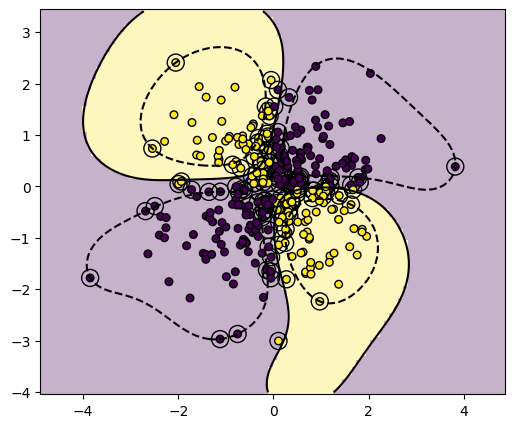

In [ ]:
X = data
y = labels
clf = svm.SVC(kernel="rbf",C=1)
svm_fit_plot(clf,X,y)

# Experimento Final

GridSearch para estimar um bom modelo SVM

<Axes: xlabel='0', ylabel='1'>

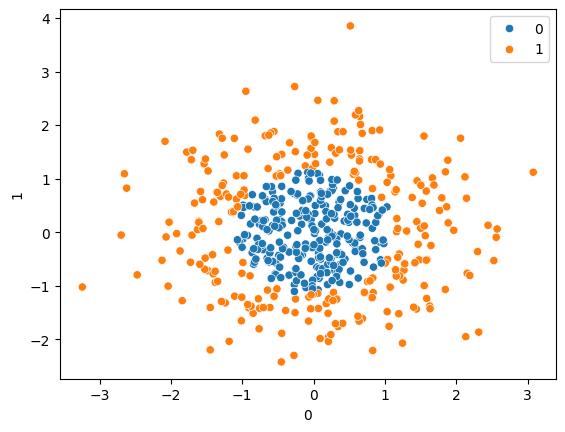

In [ ]:
data, labels = make_gaussian_quantiles(n_features=2, n_samples=500,  n_classes=2, random_state=42)
sns.scatterplot(data=pd.DataFrame(data), x=0, y=1,hue=labels)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=0)

parameters = {
    'kernel':('linear','rbf','poly','sigmoid'),
    'C':[0.1, 1, 10, 100, 1000]
    }

skfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

grid_search = GridSearchCV(svm.SVC(), parameters, cv=skfold, scoring='accuracy')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'kernel': ('linear', 'rbf', 'poly', 'sigmoid')},
             scoring='accuracy')

Verificando os resultados experimentais

In [ ]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003152,0.000784,0.001199,0.000084,0.1,linear,"{'C': 0.1, 'kernel': 'linear'}",0.671429,0.528571,0.571429,0.628571,0.657143,0.611429,0.053757,10
1,0.002436,0.000101,0.001351,0.000081,0.1,rbf,"{'C': 0.1, 'kernel': 'rbf'}",0.985714,0.971429,0.928571,0.957143,0.971429,0.962857,0.019378,4
2,0.003265,0.000482,0.001260,0.000200,0.1,poly,"{'C': 0.1, 'kernel': 'poly'}",0.528571,0.528571,0.614286,0.528571,0.514286,0.542857,0.036140,13
3,0.005370,0.000211,0.001805,0.000031,0.1,sigmoid,"{'C': 0.1, 'kernel': 'sigmoid'}",0.657143,0.571429,0.500000,0.614286,0.571429,0.582857,0.052216,12
4,0.003054,0.000211,0.001214,0.000269,1,linear,"{'C': 1, 'kernel': 'linear'}",0.671429,0.528571,0.557143,0.614286,0.685714,0.611429,0.061545,10
5,0.001785,0.000241,0.001016,0.000040,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.985714,0.985714,0.957143,0.914286,0.971429,0.962857,0.026496,5
6,0.004247,0.000201,0.001176,0.000080,1,poly,"{'C': 1, 'kernel': 'poly'}",0.528571,0.528571,0.614286,0.514286,0.514286,0.540000,0.037688,14
7,0.004367,0.000483,0.001370,0.000045,1,sigmoid,"{'C': 1, 'kernel': 'sigmoid'}",0.700000,0.642857,0.500000,0.628571,0.628571,0.620000,0.065528,6
8,0.006022,0.000266,0.001126,0.000018,10,linear,"{'C': 10, 'kernel': 'linear'}",0.671429,0.528571,0.557143,0.642857,0.685714,0.617143,0.062857,9
9,0.001524,0.000128,0.000849,0.000024,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.985714,0.971429,0.971429,0.957143,0.985714,0.974286,0.010690,3


Identificando os melhores parâmetros e o desempenho associado

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 100, 'kernel': 'rbf'}
0.9885714285714287


Utilizando o modelo com o melhor parâmetro para predição final no conjunto de teste

In [ ]:
clf = grid_search.best_estimator_
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        75
           1       0.99      0.97      0.98        75

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



Vamos comparar com uma DecisionTreeClassifier

In [ ]:
parameters = {
    'criterion':('entropy','gini'),
    'max_depth':[3, 5, 10, None]
    }

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=0), parameters, cv=skfold, scoring='accuracy')
grid_search.fit(X_train, y_train)

print('Melhores parametros e scores:')
print(grid_search.best_params_)
print(grid_search.best_score_)

print('Usando nosso melhor classificador no teste:')
clf = grid_search.best_estimator_
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

Melhores parametros e scores:
{'criterion': 'entropy', 'max_depth': 10}
0.9457142857142857
Usando nosso melhor classificador no teste:
              precision    recall  f1-score   support

           0       0.90      0.99      0.94        75
           1       0.99      0.89      0.94        75

    accuracy                           0.94       150
   macro avg       0.94      0.94      0.94       150
weighted avg       0.94      0.94      0.94       150

